In [1]:
from graph import *
import pickle
from pprint import pprint
import numpy as np

In [3]:
profile_info = []
nodes = []
edges = []
deg_dist = [i for i in range(0, 100, 5)]

root = '../graph_bin_data/2022年全国高考A平台数据/'
filename_list = os.listdir(root)
for filename in filename_list:
    pprint(f'read file {filename}')
    with open(root+filename, "rb") as f:
        graph = pickle.load(f)
        profile_info.append((filename, graph.profile()))
        cur_nodes, cur_edges = [], []
        for deg in deg_dist:
            cur_nodes.append(len(graph.get_nodes(deg)))
            cur_edges.append(len(graph.get_edges(deg)))
        nodes.append(cur_nodes)
        edges.append(cur_edges)      
    pprint(f'finish read file {filename}')
    
pprint(profile_info)
# pprint(nodes)
# pprint(edges)  

'read file 34918246_checkpoint.graph'
'finish read file 34918246_checkpoint.graph'
'read file 34918253_checkpoint.graph'
'finish read file 34918253_checkpoint.graph'
'read file 34918260_checkpoint.graph'
'finish read file 34918260_checkpoint.graph'
'read file 34918267_checkpoint.graph'
'finish read file 34918267_checkpoint.graph'
'read file 34918274_checkpoint.graph'
'finish read file 34918274_checkpoint.graph'
'read file 34918281_checkpoint.graph'
'finish read file 34918281_checkpoint.graph'
'read file 34918288_checkpoint.graph'
'finish read file 34918288_checkpoint.graph'
'read file 34918295_checkpoint.graph'
'finish read file 34918295_checkpoint.graph'
'read file 34918302_checkpoint.graph'
'finish read file 34918302_checkpoint.graph'
'read file 34918316_checkpoint.graph'
'finish read file 34918316_checkpoint.graph'
'read file 34918323_checkpoint.graph'
'finish read file 34918323_checkpoint.graph'
'read file 34918330_checkpoint.graph'
'finish read file 34918330_checkpoint.graph'
'rea

In [4]:
with open(root+'34918512_checkpoint.graph', "rb") as f:
    graph = pickle.load(f)
    id = graph.get_user_by_deg(926)
    print(id)

银盐鱼


In [5]:
with open(root+'34918505_checkpoint.graph', "rb") as f:
    graph = pickle.load(f)
    id = graph.get_user_by_deg(486)
    print(id)

internet-garcon-pdf


In [6]:
with open(root+'34918463_checkpoint.graph', "rb") as f:
    graph = pickle.load(f)
    id = graph.get_user_by_deg(232)
    print(id)

梁州Zz


In [8]:
sort_list = sorted(profile_info, key=lambda x: x[1]['max_deg'], reverse=True)
pprint(sort_list)

[('34918512_checkpoint.graph',
  {'max_deg': 926, 'num_edges': 19294, 'num_nodes': 19996}),
 ('34918505_checkpoint.graph',
  {'max_deg': 486, 'num_edges': 17401, 'num_nodes': 17107}),
 ('34918400_checkpoint.graph',
  {'max_deg': 300, 'num_edges': 31728, 'num_nodes': 32056}),
 ('34918463_checkpoint.graph',
  {'max_deg': 232, 'num_edges': 17363, 'num_nodes': 16483}),
 ('34918337_checkpoint.graph',
  {'max_deg': 223, 'num_edges': 11714, 'num_nodes': 11834}),
 ('34918435_checkpoint.graph',
  {'max_deg': 220, 'num_edges': 16223, 'num_nodes': 16485}),
 ('34918470_checkpoint.graph',
  {'max_deg': 207, 'num_edges': 11727, 'num_nodes': 12246}),
 ('34918449_checkpoint.graph',
  {'max_deg': 171, 'num_edges': 19758, 'num_nodes': 18622}),
 ('34918421_checkpoint.graph',
  {'max_deg': 156, 'num_edges': 13723, 'num_nodes': 14400}),
 ('34918330_checkpoint.graph',
  {'max_deg': 149, 'num_edges': 5883, 'num_nodes': 6311}),
 ('34918456_checkpoint.graph',
  {'max_deg': 131, 'num_edges': 7793, 'num_nodes': 

In [14]:
for i in range(10):
    with open(root+sort_list[i][0], "rb") as f:
        # print(sort_list[i][1]['max_deg'])
        graph = pickle.load(f)
        id = graph.get_user_by_deg(sort_list[i][1]['max_deg'])
        print(id, sort_list[i][1]['max_deg'])
        

银盐鱼 926
internet-garcon-pdf 486
康堤will 300
梁州Zz 232
正直男孩 223
JoannaBlue 220
起肖蔷 207
马德我好讨厌下雨天 171
M大王叫我来巡山 156
PeterLeaf 149


In [14]:
# 以高考话题A平台为例

# 总结点数，也就是转发链中可能的关键人物数量(候选者)
sum_nodes = sum([profile_info[i]['num_nodes'] for i in range(len(profile_info))])
sum_nodes

0

In [15]:
# 总边数  可以看出图相当稀疏
sum_edges = sum([profile_info[i]['num_edges'] for i in range(len(profile_info))])
sum_edges

0

In [6]:
# 构成的图中的最大度
max_deg = max([profile_info[i]['max_deg'] for i in range(len(profile_info))])
max_deg

366

In [7]:
# deg-nodes， deg-edges幂律分布
nodes_np = np.array(nodes)
edges_np = np.array(edges)
deg_nodes = np.sum(nodes_np, axis=0)
deg_edges = np.sum(edges_np, axis=0)

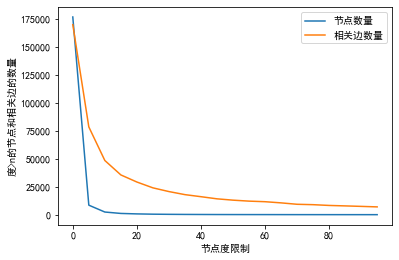

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'

plt.plot([i for i in range(0, 100, 5)], deg_nodes, label='节点数量')
plt.plot([i for i in range(0, 100, 5)], deg_edges, label='相关边数量')
plt.xlabel('节点度限制')
plt.ylabel('度>n的节点和相关边的数量')
plt.legend()
plt.savefig('power-law-chunwan.jpg', dpi=750, bbox_inches='tight')
plt.show()

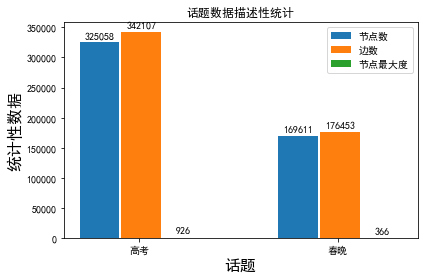

In [20]:
# final bar plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码

labels = ['高考', '春晚']
edges = [325058, 169611]
nodes = [342107, 176453]
max_deg = [926, 366]


x = np.arange(len(labels))  # 标签位置
width = 0.2  # 柱状图的宽度，可以根据自己的需求和审美来改

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, edges, width, label='节点数')
rects2 = ax.bar(x + 0.01, nodes, width, label='边数')
rects3 = ax.bar(x + width + 0.02, max_deg, width, label='节点最大度')


# 为y轴、标题和x轴等添加一些文本。
ax.set_ylabel('统计性数据', fontsize=16)
ax.set_xlabel('话题', fontsize=16)
ax.set_title('话题数据描述性统计')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """在*rects*中的每个柱状条上方附加一个文本标签，显示其高度"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.savefig('统计性描述.jpg', dpi=750, bbox_inches='tight')
plt.show()

